In [1]:
import torch
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
import os, sys

import matplotlib.pyplot as plt

In [2]:
## This are the configuration of all the parameters

ModelOutDIR = "Bsize64_lr5e-4_NOnormNodes/"
BatchSize = 1024
LearningRate = 0.0005
Epochs = 500


In [3]:
import os
## check if EOS folder exists otherwise use local folder
if os.path.exists("/eos/cms/store/user/folguera/L1TMuon/INTREPID/Graphs_v240725_241113/"):
    GraphDIR = "/eos/cms/store/user/folguera/L1TMuon/INTREPID/Graphs_v240725_241113/"
else:
    GraphDIR = "../../data/"

graph_name = 'vix_graph_13Nov_3_muonQOverPt' #"vix_graph_13Nov_3_muonQOverPt" #vix_graph_6Nov_3_muonQOverPt
num_files = 20
Allgraphs = []
all_files = os.listdir(GraphDIR)

# Filter for .pkl files
graph_files = [f for f in all_files if (f.endswith('.pkl') or f.endswith('.pt')) and graph_name in f]
if not graph_files:
    print("No .pkl/.pt files found in the directory.")
    sys.exit()

graph_files = graph_files[:num_files]

graphs = []
for graph_file in graph_files:
    file_path = os.path.join(GraphDIR, graph_file)
    print(f"Loading file: {graph_file}")
    if graph_file.endswith('.pt'):
        graph = torch.load(file_path)
    elif graph_file.endswith('.pkl'):
        with open(file_path, 'rb') as file:
            graph = torch.load(file)
    graphs.append(graph)

Loading file: vix_graph_13Nov_3_muonQOverPt_001.pt
Loading file: vix_graph_13Nov_3_muonQOverPt_002.pt
Loading file: vix_graph_13Nov_3_muonQOverPt_003.pt
Loading file: vix_graph_13Nov_3_muonQOverPt_004.pt
Loading file: vix_graph_13Nov_3_muonQOverPt_005.pt
Loading file: vix_graph_13Nov_3_muonQOverPt_006.pt
Loading file: vix_graph_13Nov_3_muonQOverPt_007.pt
Loading file: vix_graph_13Nov_3_muonQOverPt_008.pt
Loading file: vix_graph_13Nov_3_muonQOverPt_009.pt
Loading file: vix_graph_13Nov_3_muonQOverPt_010.pt
Loading file: vix_graph_13Nov_3_muonQOverPt_011.pt
Loading file: vix_graph_13Nov_3_muonQOverPt_012.pt
Loading file: vix_graph_13Nov_3_muonQOverPt_013.pt
Loading file: vix_graph_13Nov_3_muonQOverPt_014.pt
Loading file: vix_graph_13Nov_3_muonQOverPt_015.pt
Loading file: vix_graph_13Nov_3_muonQOverPt_016.pt
Loading file: vix_graph_13Nov_3_muonQOverPt_017.pt
Loading file: vix_graph_13Nov_3_muonQOverPt_018.pt
Loading file: vix_graph_13Nov_3_muonQOverPt_019.pt
Loading file: vix_graph_13Nov_3

## Load data

In [4]:
import torch_geometric.transforms as T
                   
Graphs_for_training = sum(graphs, [])
Graphs_for_training_reduced = Graphs_for_training
Graphs_for_training_filtered = [
    g for g in Graphs_for_training_reduced
    if not (torch.isnan(g.y).any() or torch.isnan(g.x).any())  and g.edge_index.size(1) > 0
]

for i in range(0, len(Graphs_for_training_filtered)):
    Graphs_for_training_filtered[i].y = Graphs_for_training_filtered[i].y.mean(dim=0)
    Graphs_for_training_filtered[i].edge_attr = torch.stack([Graphs_for_training_filtered[i].deltaPhi.float(), Graphs_for_training_filtered[i].deltaEta.float()], dim=1)        

# remove extra dimenson in y
print(f"Total Graphs: {len(Graphs_for_training)}")
print(f"Total Graphs after filtering: {len(Graphs_for_training_filtered)}")
for i in range(0, len(Graphs_for_training_filtered)):
    Graphs_for_training_filtered[i].y = Graphs_for_training_filtered[i].y.mean(dim=0)

for i in range(0, len(Graphs_for_training_filtered)):
    Graphs_for_training_filtered[i].y = Graphs_for_training_filtered[i].y.mean(dim=0)
    Graphs_for_training_filtered[i].edge_attr = torch.stack([Graphs_for_training_filtered[i].deltaPhi.float(), Graphs_for_training_filtered[i].deltaEta.float()], dim=1)        

Graphs_for_training_filtered = [
    g for g in Graphs_for_training_filtered
    if not (torch.isnan(g.x).any() or torch.isnan(g.edge_attr).any() or torch.isnan(g.y).any())
]
print(f"Total Graphs after filtering: {len(Graphs_for_training_filtered)}")



print("====================================")
print("Example of data:")
print(type(Graphs_for_training_filtered[0]))
print(Graphs_for_training_filtered[0].x)
print(Graphs_for_training_filtered[0].edge_index)
print(Graphs_for_training_filtered[0].edge_attr)
print(Graphs_for_training_filtered[0].y)
print("====================================")

Total Graphs: 1128585
Total Graphs after filtering: 1117523
Total Graphs after filtering: 1117523
Example of data:
<class 'torch_geometric.data.data.Data'>
tensor([[1.0331e+00, 1.3951e+00, 1.0060e+03, 6.0000e+00, 9.0000e+00],
        [1.0114e+00, 1.3881e+00, 1.0767e+03, 1.5000e+01, 5.0000e+00],
        [1.0440e+00, 1.4044e+00, 1.1959e+03, 7.0000e+00, 9.0000e+00],
        [1.1092e+00, 1.3614e+00, 4.1368e+02, 1.0000e+01, 5.0000e+00]],
       dtype=torch.float64)
tensor([[0, 0, 0, 1, 1, 2, 2, 3],
        [1, 2, 3, 0, 2, 0, 1, 0]])
tensor([[-0.0070, -0.0217],
        [ 0.0093,  0.0109],
        [-0.0337,  0.0761],
        [-0.0070, -0.0217],
        [-0.0163, -0.0326],
        [ 0.0093,  0.0109],
        [-0.0163, -0.0326],
        [-0.0337,  0.0761]])
tensor(-0.0969)


In [5]:
from torch_geometric.transforms import BaseTransform, Compose

class NormalizeNodeFeatures(BaseTransform):
    def __call__(self, data):
        if hasattr(data, 'x'):
            data.x = (data.x - data.x.mean(dim=0)) / data.x.std(dim=0)
        return data

class NormalizeEdgeFeatures(BaseTransform):
    def __call__(self, data):
        if hasattr(data, 'edge_attr'):
            data.edge_attr = (data.edge_attr - data.edge_attr.mean(dim=0)) / data.edge_attr.std(dim=0)
        return data

class NormalizeTargets(BaseTransform):
    def __call__(self, data):
        if hasattr(data, 'y'):
            data.y = (data.y - data.y.mean(dim=0)) / data.y.std(dim=0)
        return data

class DropLastTwoNodeFeatures(BaseTransform):
    def __call__(self, data):
        if hasattr(data, 'x'):
            data.x = data.x[:, :-2]  # Eliminar las dos últimas columnas
        return data

# Definir las transformaciones
transform = Compose([
    NormalizeNodeFeatures(),
    NormalizeEdgeFeatures(),
    DropLastTwoNodeFeatures()  # Aplicar la transformación para eliminar las dos últimas características
])

# Aplicar las transformaciones a los datos
Graphs_for_training_filtered = [transform(data) for data in Graphs_for_training_filtered]


Graphs_for_training_filtered = [
    g for g in Graphs_for_training_filtered
    if not (torch.isnan(g.x).any() or torch.isnan(g.edge_attr).any() or torch.isnan(g.y).any())
]
print(f"Total Graphs after filtering: {len(Graphs_for_training_filtered)}")

print("====================================")
print("Example of (transformed) data:")
print(Graphs_for_training_filtered[0].x)
print(Graphs_for_training_filtered[0].edge_index)
print(Graphs_for_training_filtered[0].edge_attr)
print(Graphs_for_training_filtered[0].y)
print("====================================")

Total Graphs after filtering: 1080007
Example of (transformed) data:
tensor([[-0.3873,  0.4244,  0.2380],
        [-0.9037,  0.0472,  0.4408],
        [-0.1291,  0.9275,  0.7827],
        [ 1.4201, -1.3991, -1.4616]], dtype=torch.float64)
tensor([[0, 0, 0, 1, 1, 2, 2, 3],
        [1, 2, 3, 0, 2, 0, 1, 0]])
tensor([[ 0.2970, -0.6601],
        [ 1.2753,  0.0600],
        [-1.3102,  1.5002],
        [ 0.2970, -0.6601],
        [-0.2620, -0.9001],
        [ 1.2753,  0.0600],
        [-0.2620, -0.9001],
        [-1.3102,  1.5002]])
tensor(-0.0969)


In [6]:
# Load data
events = len(Graphs_for_training_filtered)
ntrain = int((events * 0.7) / BatchSize) * BatchSize  # to have full batches
print(f"Training events: {ntrain}")

train_dataset = Graphs_for_training_filtered[:ntrain]
test_dataset = Graphs_for_training_filtered[ntrain:ntrain * 2]

train_loader = DataLoader(train_dataset, batch_size=BatchSize, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BatchSize, shuffle=False)

Training events: 755712


### Validate graphs

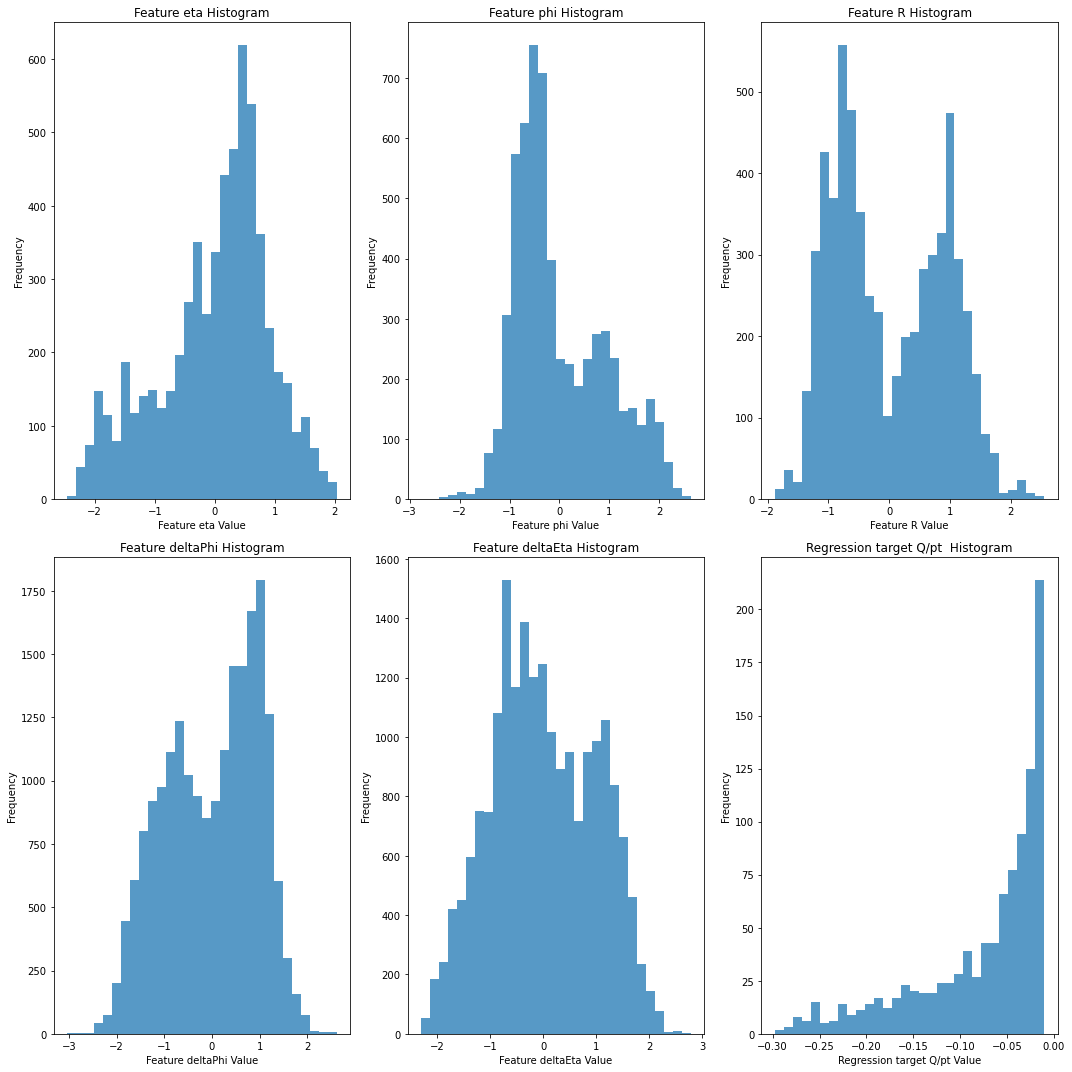

In [7]:
import matplotlib.pyplot as plt

# Function to plot histograms for each feature in the same figure

def plot_histograms(data_loader):   
    feature_names = ["eta", "phi", "R",  "deltaPhi", "deltaEta","Q/pt"]
    for batch in data_loader:
        features = batch.x.numpy()
        regression = batch.y.numpy()
        num_features = features.shape[1]
        fig, axs = plt.subplots(2, 3, figsize=(15, 15))
        axs = axs.flatten()
        
        # Plot node features
        for i in range(num_features):
            axs[i].hist(features[:, i], bins=30, alpha=0.75)
            axs[i].set_title(f'Feature {feature_names[i]} Histogram')
            axs[i].set_xlabel(f'Feature {feature_names[i]} Value')
            axs[i].set_ylabel('Frequency')
        
        
        # plot the number of edges of each graph
        for i in range(batch.edge_attr.shape[1]):
            axs[i+num_features].hist(batch.edge_attr[:, i], bins=30, alpha=0.75)
            axs[i+num_features].set_title(f'Feature {feature_names[i+num_features]} Histogram')
            axs[i+num_features].set_xlabel(f'Feature {feature_names[i+num_features]} Value')
            axs[i+num_features].set_ylabel('Frequency')
        
        # Plot regression target
        axs[num_features + (batch.edge_attr.shape[1])].hist(regression, bins=30, alpha=0.75)
        axs[num_features + (batch.edge_attr.shape[1])].set_title(f'Regression target {feature_names[-1]}  Histogram')
        axs[num_features + (batch.edge_attr.shape[1])].set_xlabel(f'Regression target {feature_names[-1]} Value')
        axs[num_features + (batch.edge_attr.shape[1])].set_ylabel('Frequency')
              
        plt.tight_layout()
        plt.show()
        break  # Only draw the first batch

# Plot histograms for training data
plot_histograms(train_loader)

## Define model

In [8]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import MessagePassing, global_max_pool, global_mean_pool, AttentionalAggregation
from torch_geometric.utils import add_self_loops, degree, softmax

class MPL(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(MPL, self).__init__(aggr='add')
        self.mlp1 = torch.nn.Linear(in_channels*2, out_channels)
        self.mlp2 = torch.nn.Linear(in_channels, out_channels)
        self.mlp3 = torch.nn.Linear(2*out_channels, 1)
        self.mlp4 = torch.nn.Linear(2*out_channels, 1)
        self.mlp5 = torch.nn.Linear(in_channels,16)
        self.mlp6 = torch.nn.Linear(out_channels,16)
        self.mlp7 = torch.nn.Linear(16,1)

    def forward(self, x, edge_index):
#         edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))
        msg = self.propagate(edge_index, x=x.float())
        x = F.relu(self.mlp2(x))
        w1 = F.sigmoid(self.mlp3(torch.cat([x,msg], dim=1)))
        w2 = F.sigmoid(self.mlp4(torch.cat([x,msg], dim=1)))
        out = w1*msg + w2*x
        
        return out

    def message(self, x_i, x_j, edge_index):
        msg = F.relu(self.mlp1(torch.cat([x_i, x_j-x_i], dim=1)))
        w1 = F.tanh(self.mlp5(x_i))
        w2 = F.tanh(self.mlp6(msg))
        w = self.mlp7(w1*w2)
        w = softmax(w, edge_index[0])
        return msg*w

class MPLNNRegressor(torch.nn.Module):
    def __init__(self,in_channels):
        super(MPLNNRegressor, self).__init__()
        self.conv1 = MPL(in_channels,128 )
        self.conv2 = MPL(128,64)
        self.conv3 = MPL(64,64 )
        self.conv4 = MPL(64,64 )
        self.lin1 = torch.nn.Linear(128, 128)
        self.lin2 = torch.nn.Linear(128, 16)
        self.lin3 = torch.nn.Linear(16, 16)
        self.lin4 = torch.nn.Linear(16, 1)
        self.lin5 = torch.nn.Linear(128, 128)
        self.lin6 = torch.nn.Linear(128, 16)
        self.lin7 = torch.nn.Linear(16, 16)
        self.lin8 = torch.nn.Linear(16, 1)
        self.global_att_pool1 = AttentionalAggregation(torch.nn.Sequential(torch.nn.Linear(64, 1)))
        self.global_att_pool2 = AttentionalAggregation(torch.nn.Sequential(torch.nn.Linear(64, 1)))
    
    def forward(self, data):
        x, edge_index, batch = data.x.float(), data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x1 = self.global_att_pool1(x, batch)
        x = F.relu(self.conv3(x, edge_index))
        x = F.relu(self.conv4(x, edge_index))
        x2 = self.global_att_pool2(x, batch)
        x_out = torch.cat([x1, x2], dim=1)
        x = F.relu(self.lin1(x_out))
        x = F.relu(self.lin2(x))
        x = self.lin3(x)
        x = self.lin4(x).squeeze(1)

        return x


In [9]:
from torch_geometric.nn import GATConv

class GATRegressor(torch.nn.Module):
    def __init__(self, num_node_features, hidden_dim, output_dim=1):
        super(GATRegressor, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_dim, add_self_loops=False)
        self.conv2 = GATConv(hidden_dim, hidden_dim, add_self_loops=False)
        self.fc1 = torch.nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, data):
        x, edge_index, edge_attr, batch = data.x.float(), data.edge_index, data.edge_attr, data.batch
        
        x = F.relu(x)
        x = self.conv1(x, edge_index, edge_attr=edge_attr)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_attr=edge_attr)
        x = F.relu(x)
        x = torch.cat([global_max_pool(x, batch), global_mean_pool(x, batch)], dim=1)
        x = self.fc1(x)
        return x
    
class GATModel(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=1):
        super(GATModel, self).__init__()
        self.conv1 = GATConv(in_channels, hidden_channels, heads=heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * heads, hidden_channels, heads=heads, dropout=0.6)
        self.conv3 = GATConv(hidden_channels * heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.fc1 = torch.nn.Linear(hidden_channels * 2, out_channels)

    def forward(self, data):
        x, edge_index = data.x.float(), data.edge_index
        x = F.dropout(x, p=0.6, training=self.training)
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.6, training=self.training)
        x = F.elu(self.conv2(x, edge_index))
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv3(x, edge_index)
        x = F.elu(x)
        x = torch.cat([global_max_pool(x, data.batch), global_mean_pool(x, data.batch)], dim=1)
        x = self.fc1(x)       
        return x

from torch_geometric.nn import SAGEConv
class GraphSAGEModel(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphSAGEModel, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels*4)
        self.conv2 = SAGEConv(hidden_channels*4, hidden_channels*2)
        self.conv3 = SAGEConv(hidden_channels*2, hidden_channels*2)
        self.conv4 = SAGEConv(hidden_channels*2, hidden_channels*2)

        self.lin1 = torch.nn.Linear(hidden_channels*2, hidden_channels*2)
        self.lin2 = torch.nn.Linear(hidden_channels*2, hidden_channels)
        self.lin3 = torch.nn.Linear(hidden_channels, hidden_channels)
        self.lin4 = torch.nn.Linear(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x.float(), data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = F.relu(self.conv3(x, edge_index))
        x = F.relu(self.conv4(x, edge_index))
        x = global_mean_pool(x, data.batch)
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        x = F.relu(self.lin3(x))
        x = self.lin4(x).squeeze(1)
       
        return x

## Train model

In [10]:
# Definir el modelo, optimizador y la función de pérdida
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_GATRegressor = GATRegressor(num_node_features=3, hidden_dim=32).to(device)
optimizer = torch.optim.Adam(model_GATRegressor.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()
print(model_GATRegressor)

# Third model: 
model_SAGEModel = GraphSAGEModel(in_channels=3, hidden_channels=32, out_channels=1).to(device)
optimizer_SAGEModel = torch.optim.Adam(model_SAGEModel.parameters(), lr=0.001)
print(model_SAGEModel)

# Fourth model:
model_MPNNRegressor = MPLNNRegressor(in_channels=3).to(device)
optimizer_MPNNRegressor = torch.optim.Adam(model_MPNNRegressor.parameters(), lr=0.001)
print(model_MPNNRegressor)

GATRegressor(
  (conv1): GATConv(3, 32, heads=1)
  (conv2): GATConv(32, 32, heads=1)
  (fc1): Linear(in_features=64, out_features=1, bias=True)
)
GraphSAGEModel(
  (conv1): SAGEConv(3, 128, aggr=mean)
  (conv2): SAGEConv(128, 64, aggr=mean)
  (conv3): SAGEConv(64, 64, aggr=mean)
  (conv4): SAGEConv(64, 64, aggr=mean)
  (lin1): Linear(in_features=64, out_features=64, bias=True)
  (lin2): Linear(in_features=64, out_features=32, bias=True)
  (lin3): Linear(in_features=32, out_features=32, bias=True)
  (lin4): Linear(in_features=32, out_features=1, bias=True)
)
MPLNNRegressor(
  (conv1): MPL()
  (conv2): MPL()
  (conv3): MPL()
  (conv4): MPL()
  (lin1): Linear(in_features=128, out_features=128, bias=True)
  (lin2): Linear(in_features=128, out_features=16, bias=True)
  (lin3): Linear(in_features=16, out_features=16, bias=True)
  (lin4): Linear(in_features=16, out_features=1, bias=True)
  (lin5): Linear(in_features=128, out_features=128, bias=True)
  (lin6): Linear(in_features=128, out_featu

In [11]:
# Definir una función para entrenar el modelo
def train_model(model, train_loader, optimizer, loss_fn, device):
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)

        optimizer.zero_grad()
        out = model(data)
        loss = loss_fn(out, data.y.view(out.size()))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

# Definir una función para evaluar el modelo
@torch.no_grad()
def test_model(model, test_loader, loss_fn, device):
    model.eval()
    total_loss = 0
    for data in test_loader:
        data = data.to(device)
        out = model(data)
        loss = loss_fn(out, data.y.view(out.size()))
        total_loss += loss.item()
    return total_loss / len(test_loader)


In [ ]:
# Entrenar y evaluar el modelo
num_epochs = 20
for epoch in range(num_epochs):

    GAT_train_loss = train_model(model_GATRegressor, train_loader, optimizer, loss_fn, device)
    GAT_test_loss = test_model(model_GATRegressor, test_loader, loss_fn, device)

    SAGEModel_train_loss = train_model(model_SAGEModel, train_loader, optimizer_SAGEModel, loss_fn, device)
    SAGEModel_test_loss = test_model(model_SAGEModel, test_loader, loss_fn, device)
    
    MPNN_train_loss = train_model(model_MPNNRegressor, train_loader, optimizer_MPNNRegressor, loss_fn, device)
    MPNN_test_loss = test_model(model_MPNNRegressor, test_loader, loss_fn, device)

    # Print the loss for each epoch, in a table of all models: 
    print(f'Epoch {epoch+1:3d}/{num_epochs:3d}, GAT Loss: {GAT_train_loss:.4f} ({GAT_test_loss:.4f}) | SAGEModel Loss: {SAGEModel_train_loss:.4f} ({SAGEModel_test_loss:.4f}) | MPNN Loss: {MPNN_train_loss:.4f} ({MPNN_test_loss:.4f})')


Epoch   1/ 20, GAT Loss: 0.0037 (0.0036) | SAGEModel Loss: 0.0024 (0.0020) | MPNN Loss: 0.0021 (0.0017)
Epoch   2/ 20, GAT Loss: 0.0033 (0.0034) | SAGEModel Loss: 0.0017 (0.0017) | MPNN Loss: 0.0015 (0.0015)
Epoch   3/ 20, GAT Loss: 0.0032 (0.0033) | SAGEModel Loss: 0.0015 (0.0016) | MPNN Loss: 0.0013 (0.0014)
Epoch   4/ 20, GAT Loss: 0.0031 (0.0032) | SAGEModel Loss: 0.0014 (0.0015) | MPNN Loss: 0.0012 (0.0013)
Epoch   5/ 20, GAT Loss: 0.0031 (0.0032) | SAGEModel Loss: 0.0013 (0.0014) | MPNN Loss: 0.0011 (0.0013)
Epoch   6/ 20, GAT Loss: 0.0030 (0.0032) | SAGEModel Loss: 0.0012 (0.0014) | MPNN Loss: 0.0011 (0.0012)
Epoch   7/ 20, GAT Loss: 0.0030 (0.0032) | SAGEModel Loss: 0.0012 (0.0014) | MPNN Loss: 0.0011 (0.0012)
Epoch   8/ 20, GAT Loss: 0.0030 (0.0031) | SAGEModel Loss: 0.0012 (0.0013) | MPNN Loss: 0.0010 (0.0012)
Epoch   9/ 20, GAT Loss: 0.0030 (0.0032) | SAGEModel Loss: 0.0011 (0.0013) | MPNN Loss: 0.0010 (0.0012)
Epoch  10/ 20, GAT Loss: 0.0029 (0.0031) | SAGEModel Loss: 0.001

In [ ]:
# Save the model
if not os.path.exists(ModelOutDIR):
    os.makedirs(ModelOutDIR)

torch.save(model_GATRegressor.state_dict(), f'{ModelOutDIR}model_GATRegressor_{BatchSize}batches_{num_epochs}epochs_3_32_32_1.pt')
torch.save(model_SAGEModel.state_dict(), f'{ModelOutDIR}model_SAGEModel_{BatchSize}batches_{num_epochs}epochs_3_128_64_32_1.pt')
torch.save(model_MPNNRegressor.state_dict(), f'{ModelOutDIR}model_MPNNRegressor_{BatchSize}batches_{num_epochs}epochs_4MPL_8Lins.pt')

## Validate model

In [ ]:
## Plot the results
import numpy as np

def remove_outliers(data, m=1.5):
    data = np.array(data)
    median = np.median(data)
    diff = np.abs(data - median)
    mad = np.median(diff)
    modified_z_score = 0.6745 * diff / mad
    return data[modified_z_score < m]

def evaluate_model(model, test_loader, device):
    model.eval()
    total_loss = 0
    all_regression = []
    all_prediction = []
    with torch.no_grad():
        for data in test_loader:
            #only one batch
            data = data.to(device)
            out = model(data)
            all_regression.append(data.y.cpu().numpy())
            all_prediction.append(out.cpu().numpy())
    
    
    # Concatenar todas las predicciones y valores objetivo
    all_regression = np.concatenate(all_regression, axis=0)
    all_prediction = np.concatenate(all_prediction, axis=0)
    
    return all_regression, all_prediction

regression_list = []
prediction_list = []

for model in [model_GATRegressor, model_SAGEModel,model_MPNNRegressor]:
    print(f'Evaluating model {model}')
    regression, prediction = evaluate_model(model, test_loader, device)
    regression_list.append((regression))
    prediction_list.append((prediction))


In [ ]:
def plot_results(all_regression, all_prediction, label='Model'):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    print("Plotting Regression target")
    axs[0].hist(all_regression, bins=np.arange(-0.5,0,0.006), alpha=0.75, label='Regression target')
    axs[0].hist(all_prediction, bins=np.arange(-0.5,0,0.006), alpha=0.75, label='Prediction')
    axs[0].set_title(f'Regression target and prediction for {label}')
    axs[0].set_xlabel('Value')
    axs[0].set_ylabel('Frequency')
    axs[0].legend()

    axs[1].scatter(all_regression, all_prediction, alpha=0.5)
    axs[1].set_xlim(-0.5,0)
    axs[1].set_title(f'Regression target vs prediction for {label}')
    axs[1].set_xlabel('Regression target')
    axs[1].set_ylabel('Prediction')

    plt.tight_layout()
    plt.show()



In [ ]:
labels = ['GAT', 'SAGEModel','MPNNRegressor']

for i in range(len(labels)): 
    print(f'Plotting results for model: {labels[i]}')
    plot_results(regression_list[i], prediction_list[i], label=labels[i])